In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

import pandas as pd
import dill
import numpy as np
sns.set(font_scale=2.5, style='whitegrid')

In [2]:
#!pip install palettable
from palettable.cartocolors.diverging import Temps_5, Temps_3

In [71]:
from palettable.cartocolors.diverging import Temps_2

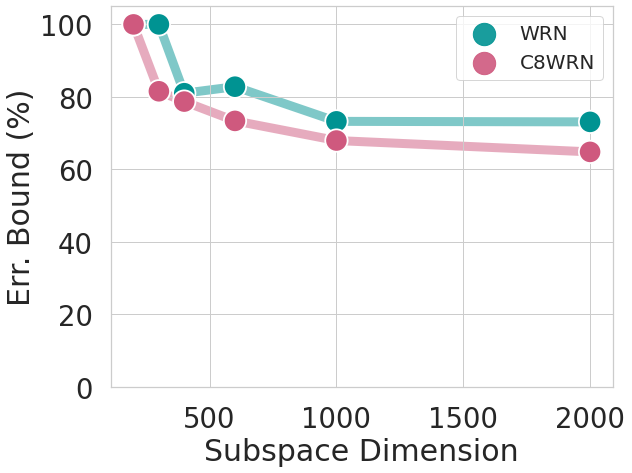

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd
import dill

# folder = '../transfer_learning/shuffled'
# # read pandas dataframe
# with open(f'{folder}/results.df', 'rb') as f:
#     df = dill.load(f)

from matplotlib import rc
# rc('text', usetex=True)
# rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})
rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)




sns.set(font_scale=2.5, style='whitegrid')
#fig, ax = plt.subplots(1,2,figsize=(20,8))
        
expt_name = 'rot_mnist'
with open(f'../experiments/equivariant/{expt_name}/results.df', 'rb') as f:
    df = dill.load(f)
df=df[df['d']>100]
df.loc[df['expt'].str.contains(''),'model']='WRN'
df.loc[df['expt'].str.contains('rot'),'model']='C8WRN'
#dfa = df[df['expt'].str.contains(expt_name)]
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(data=df, ax=ax, x='d',y='raw_err_bound_100',hue='model',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0,palette=Temps_2.mpl_colors)
sns.scatterplot(data=df, ax=ax,x='d',y='raw_err_bound_100',hue='model',marker='o', s=500,zorder=1,palette=Temps_2.mpl_colors)
handles, labels = ax.get_legend_handles_labels()
for h in handles:
    h.set_sizes([500])
    h.set_alpha(.9)
ax.legend(handles=handles, labels=labels, title='', fontsize=20)
plt.xlabel('Subspace Dimension')
plt.ylabel('Err. Bound (%)')
plt.ylim(0,105)
fig.savefig('rotmnist_equiv.pdf', bbox_inches='tight')

In [78]:
df

,expt,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,prefix_message_len,train_err_100,test_err_100,model
7,,200,trial8/,NaN,0.350000,0.003,0.338087,1601.579566,1409091.0,70.083335,70.512000,0.0,100.000000,-2.0,638.552249,64.558333,66.196001,WRN
9,,300,trial10/,NaN,0.369531,0.003,0.373893,1540.305631,1409091.0,72.583333,72.976002,0.0,100.000000,-2.0,815.273249,61.500001,62.612000,WRN
10,rot,200,trial9/,NaN,0.350000,0.003,0.358464,2140.881787,1451495.0,69.958332,70.590001,0.0,100.000000,-2.0,652.616678,63.558334,64.160001,C8WRN
11,,400,trial12/,NaN,0.458594,0.003,0.432741,1576.349259,1409091.0,66.000000,66.612002,0.0,81.018513,-2.0,1053.025249,54.991668,56.730002,WRN
12,rot,300,trial11/,NaN,0.432812,0.003,0.406094,2112.962618,1451495.0,68.450001,69.008002,0.0,81.545548,-2.0,819.287712,58.475000,59.390002,C8WRN
13,,600,trial14/,NaN,0.514844,0.003,0.487276,1567.772869,1409091.0,65.183333,65.546000,0.0,82.812193,-2.0,1518.095717,49.366665,51.282001,WRN
14,rot,400,trial13/,NaN,0.480469,0.003,0.466432,2122.031450,1451495.0,63.441667,63.758001,0.0,78.702788,-2.0,1016.922899,52.233332,53.372002,C8WRN
15,,1000,trial16/,NaN,0.616406,0.003,0.607525,1602.693366,1409091.0,48.199999,49.522001,0.0,73.245444,-2.0,2397.427424,35.975003,39.254004,WRN
16,rot,600,trial15/,NaN,0.604688,0.003,0.601027,2125.047883,1451495.0,53.883335,54.478002,0.0,73.375058,-2.0,1470.001684,39.450002,39.908004,C8WRN
17,,2000,trial18/,NaN,0.785937,0.003,0.754280,1588.360851,1409091.0,38.758332,39.873999,0.0,73.103011,-2.0,4430.210508,21.483332,24.574000,WRN


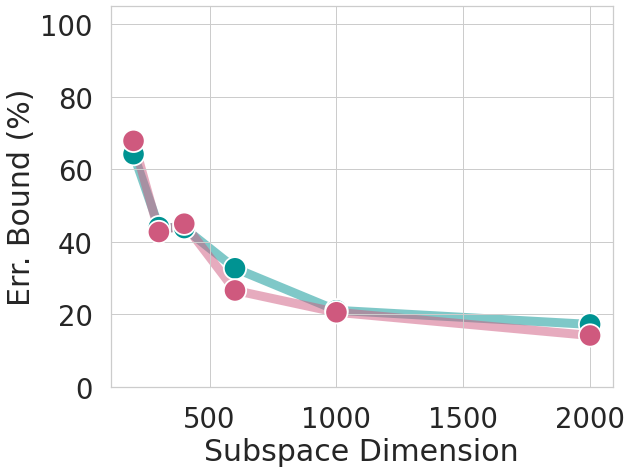

In [75]:
expt_name = 'nonrot_mnist'
with open(f'../experiments/equivariant/{expt_name}/results.df', 'rb') as f:
    df = dill.load(f)
df=df[df['d']>100]
df.loc[df['expt'].str.contains(''),'model']='WRN'
df.loc[df['expt'].str.contains('rot'),'model']='C8WRN'
#dfa = df[df['expt'].str.contains(expt_name)]
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(data=df, ax=ax, x='d',y='raw_err_bound_100',hue='model',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0,palette=Temps_2.mpl_colors)
sns.scatterplot(data=df, ax=ax,x='d',y='raw_err_bound_100',hue='model',marker='o', s=500,zorder=1,palette=Temps_2.mpl_colors,legend=False)

plt.xlabel('Subspace Dimension')
plt.ylabel('Err. Bound (%)')
plt.ylim(0,105)
fig.savefig('mnist_equiv.pdf', bbox_inches='tight')

In [60]:
df = pd.read_csv('../experiments/equivariant/equivariant_all5_nonrot.csv')
#df['ds']='RotMNIST'

In [61]:
df

,Unnamed: 0,expt,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100
0,0,NaN,1000,trial2/,NaN,0.816489,0.003,0.836036,2222.659961,1447470.0,29.060000,28.240001,0.0,39.829734,4.0,73409.498438,2139.095611,17.506665,16.370004
1,1,NaN,500,trial0/,NaN,0.764960,0.003,0.776701,2597.202817,1447470.0,45.165002,44.290000,0.0,54.354154,4.0,116657.153259,1423.908599,23.776668,22.370005
2,2,NaN,2000,trial4/,NaN,0.939495,0.003,0.944422,2064.978657,1447470.0,11.479998,10.089999,0.0,23.141546,4.0,33514.748270,3815.777486,5.933332,5.620003
3,3,rot,1000,trial3/,NaN,0.888797,0.003,0.897547,3306.120089,1451495.0,27.166665,26.160002,0.0,38.130248,4.0,73473.820587,2271.270136,11.804998,10.220003
4,4,rot,500,trial1/,NaN,0.752161,0.003,0.774921,5917.533768,1451495.0,49.836665,48.530000,0.0,58.914552,4.0,114076.372399,1407.875504,23.991668,22.479999
5,5,rot,2000,trial5/,NaN,0.932347,0.003,0.938291,2594.100556,1451495.0,13.704997,12.400001,0.0,25.180725,4.0,38860.371432,3400.443053,7.006663,6.170005
6,6,NaN,3000,trial6/,NaN,0.961935,0.003,0.967959,2049.826459,1447470.0,7.751667,7.240003,0.0,20.743422,4.0,21960.686392,5473.823552,3.518331,3.240001
7,7,NaN,4000,trial8/,NaN,0.975399,0.003,0.974189,2019.569152,1447470.0,5.895001,4.910004,0.0,20.288624,4.0,16510.065133,7172.606244,2.688330,2.610004
8,8,rot,4000,trial9/,NaN,0.971742,0.003,0.975376,2575.744326,1451495.0,3.934997,3.130001,0.0,16.640433,4.0,11102.507216,6842.469843,2.555001,2.490002
9,9,rot,3000,trial7/,NaN,0.963763,0.003,0.968552,5102.756975,1451495.0,8.306664,7.130003,0.0,20.968758,4.0,23257.774728,5094.615540,3.368330,3.180003


In [15]:
#df['ds']='MNIST'
#df.loc[df['dataset'].str.contains('Rot'),'ds']='RotMNIST'

In [62]:
df['model']='WRN'
df.loc[~df['expt'].str.contains('rot').isnull(),'model']='C8WRN'

<AxesSubplot:xlabel='d', ylabel='raw_err_bound_100'>

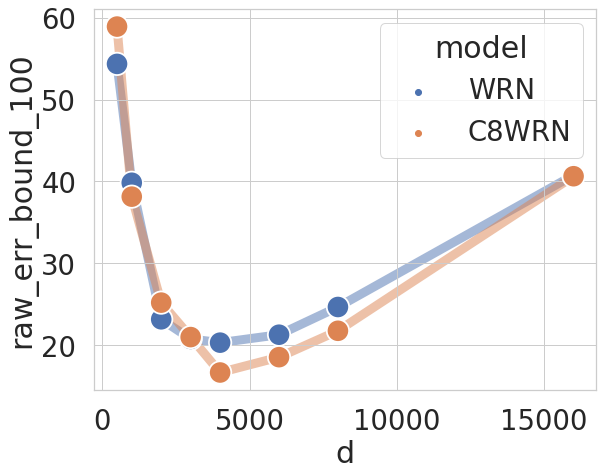

In [64]:
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(data=df, ax=ax, x='d',y='raw_err_bound_100',hue='model',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0)
sns.scatterplot(data=df, ax=ax,x='d',y='raw_err_bound_100',hue='model',marker='o', s=500,zorder=1)

In [63]:
for ds in ['RotMNIST','MNIST']:
    dfa = df[df['ds']==ds]
    fig, ax = plt.subplots(figsize=(9,7))
    sns.lineplot(data=dfa, ax=ax, x='d',y='raw_err_bound_100',hue='model',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0)
    sns.scatterplot(data=dfa, ax=ax,x='d',y='raw_err_bound_100',hue='model',marker='o', s=500,zorder=1)

KeyError: 'ds'

In [28]:
import torch
from torch.utils.data import DataLoader
from torch.optim import SGD,Adam
from oil.utils.utils import LoaderTo, cosLr, islice, export
from oil.tuning.study import train_trial
#from oil.datasetup.datasets import split_dataset,CIFAR100,CIFAR10
from pactl.data import get_dataset,get_data_dir
#from oil.architectures.img_classifiers import layer13s
from oil.utils.parallel import try_multigpu_parallelize
from oil.tuning.args import argupdated_config
from oil.model_trainers.classifier import Classifier
from functools import partial

import torch.nn as nn
import torch.nn.functional as F
from pactl.nn.projectors import LazyRandom,IDModule,RoundedKron, FixedNumpySeed, FixedPytorchSeed,RoundedDoubleKron
from pactl.nn.projectors import FiLMLazyRandom,CombinedRDKronFiLM
from oil.datasetup.datasets import augLayers,EasyIMGDataset
#import torchvision.datasets as datasets
import timm
from timm.data.transforms import RandomResizedCropAndInterpolation
import torchvision.transforms as transforms
import copy
from oil.tuning.study import Study
from oil.tuning.args import argupdated_config
import warnings
from pactl.nn import resnet20,layer13s
from pactl.nn.small_cnn import Expression
import pactl
import pandas as pd
#from pactl.bounds.get_bound_from_checkpoint import evaluate_idmodel,auto_eval
from oil.datasetup.augLayers import RandomTranslate,RandomHorizontalFlip
from pactl.bounds.get_bound_from_chk_v2 import evaluate_idmodel#,auto_eval
import numpy as np


from PIL import Image
from torchvision.datasets.utils import download_url, download_and_extract_archive, extract_archive, \
    verify_str_arg
from torchvision.datasets.vision import VisionDataset
import torchvision.datasets as ds
import os
#Rot mnist dataset
class MnistRotDataset(VisionDataset):
    """ Official RotMNIST dataset."""
    ignored_index = -100
    class_weights = None
    balanced = True
    stratify = True
    means = (0.130,)
    stds = (0.297,)
    num_targets=10
    resources = ["http://www.iro.umontreal.ca/~lisa/icml2007data/mnist_rotation_new.zip"]
    training_file = 'mnist_all_rotation_normalized_float_train_valid.amat'
    test_file = 'mnist_all_rotation_normalized_float_test.amat'
    def __init__(self,root, train=True, transform=None,download=True):
        if transform is None:
            normalize = transforms.Normalize(self.means, self.stds)
            transform = transforms.Compose([transforms.ToTensor(),normalize])
        super().__init__(root,transform=transform)
        self.train = train
        if download:
            self.download()
        if train:
            file=os.path.join(self.raw_folder, self.training_file)
        else:
            file=os.path.join(self.raw_folder, self.test_file)
        
        self.transform = transform

        data = np.loadtxt(file, delimiter=' ')
            
        self.images = data[:, :-1].reshape(-1, 28, 28).astype(np.float32)
        self.labels = data[:, -1].astype(np.int64)
        self.num_samples = len(self.labels)
    
    def __getitem__(self, index):
        image, label = self.images[index], self.labels[index]
        image = Image.fromarray(image)
        if self.transform is not None:
            image = self.transform(image)
        c,h,w = image.shape
        rgb_img = torch.zeros(3,h,w)
        return rgb_img+image, label
    def _check_exists(self):
        return (os.path.exists(os.path.join(self.raw_folder,
                                            self.training_file)) and
                os.path.exists(os.path.join(self.raw_folder,
                                            self.test_file)))
    @property
    def raw_folder(self):
        return os.path.join(self.root, self.__class__.__name__, 'raw')

    @property
    def processed_folder(self):
        return os.path.join(self.root, self.__class__.__name__, 'processed')
    def download(self):
        """Download the MNIST data if it doesn't exist in processed_folder already."""

        if self._check_exists():
            return

        os.makedirs(self.raw_folder,exist_ok=True)
        os.makedirs(self.processed_folder,exist_ok=True)

        # download files
        for url in self.resources:
            filename = url.rpartition('/')[2]
            download_and_extract_archive(url, download_root=self.raw_folder, filename=filename, md5=None)
        print('Downloaded!')

    def __len__(self):
        return len(self.labels)

import torch

from pactl.nn.e2cnn import Wide_ResNet

from oil.datasetup.datasets import EasyIMGDataset
@export
class MNIST(EasyIMGDataset,ds.MNIST):
    means = (0.1307,)
    stds = (0.3081,)
    num_targets=10

    def __getitem__(self, index):
        img, target = super().__getitem__(index)
        c,h,w = img.shape
        rgb_img = torch.zeros(3,h,w)
        return rgb_img+img, target

@export
class RotMNIST(MNIST):
    """ Unofficial RotMNIST that has the same size as MNIST (60k)"""
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        N = len(self)
        with FixedNumpySeed(182):
            angles = torch.rand(N)*2*np.pi
        with torch.no_grad():
            affineMatrices = torch.zeros(N,2,3)
            affineMatrices[:,0,0] = angles.cos()
            affineMatrices[:,1,1] = angles.cos()
            affineMatrices[:,0,1] = angles.sin()
            affineMatrices[:,1,0] = -angles.sin()
            self.data = self.data.unsqueeze(1).float()
            flowgrid = F.affine_grid(affineMatrices, size = self.data.size())
            self.data = F.grid_sample(self.data, flowgrid).squeeze(1)

In [42]:
ds = RotMNIST('.',train=False)
ds2 = MNIST('.')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


In [37]:
len(ds)

10000

In [38]:
ds.data.shape

torch.Size([10000, 28, 28])

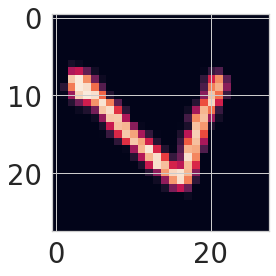

In [39]:
plt.imshow(ds.data[0])

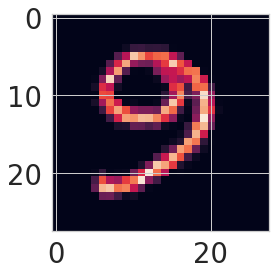

In [40]:
plt.imshow(ds.data[100])

In [41]:
ds.data[100]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [43]:
ds2.data[100]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   